## Testing for random walk

In [1]:
"""Zemla Code"""
 
import snafu
import networkx as nx

# many free parameters can be specified, see the DataModel function here:
# https://github.com/AusterweilLab/snafu-py/blob/master/snafu/structs.py
datamodel = snafu.DataModel({
 "numx": 5, # how many lists to generate?
 "trim": 15, # how many items per list?
 "start_node": "uniform" # how is the start node chosen?
 })

# import USF free association network (animal subset)
# returns adjacency matrix as numpy matrix and dictionary of animal:row/col pairs
USFnet, USFanimals = snafu.load_graph('USF_animal_subset.snet') 
USFnet = nx.to_networkx_graph(USFnet) # convert to networkx

# censored random walk
# The gen_lists function is here:
# https://github.com/AusterweilLab/snafu-py/blob/master/snafu/generate_lists.py
# It handles a variety of search variants (jumping, priming, different start
# nodes, etc) so the code is more complicated than needed for a vanilla case
censored_random_walks = snafu.gen_lists(USFnet, datamodel)[0]
censored_random_walks = snafu.numToLabel(censored_random_walks, USFanimals)


# This file includes code for the spreading activation, node-degree, and
# cluster-based depth first search processes from the 2017 cogsci paper. But, I
# was only able to get the spreading activation model to work out of the box -
# I haven't used them since 2017 and things have changed...

ModuleNotFoundError: No module named 'snafu'

In [ ]:
import networkx as nx 
import walker 
import pandas as pd
import numpy as np 

: 

In [1]:
import networkx as nx
import walker

# create a random graph
G = nx.random_partition_graph([1000] * 15, .01, .001)

# generate random walks
X = walker.random_walks(G, n_walks=50, walk_len=25)

# generate random walks with restart probability alpha
X = walker.random_walks(G, n_walks=50, walk_len=25, alpha=.1)

# you can generate random walks from specified starting nodes
X = walker.random_walks(G, n_walks=50, walk_len=25, start_nodes=[0, 1, 2])

# generate random walks according to Node2Vec methodology by specifying p and q
X = walker.random_walks(G, n_walks=50, walk_len=25, p=.25, q=.25)

# corrupt random walks by randomly changing nodes in random walks
# `y` matrix has a size (N, walk_len - 1) with:
# y[i, j] = 1 if nodes X[i, j] and X[i, j + 1] share an edge, 0 otherwise
y = walker.corrupt(G, X, r=.1)

Random walks - T=0.22s
Random walks - T=0.21s
Random walks - T=0.12s
Random walks - T=0.77s
Corrupt random walks - T=0.16s


In [ ]:
def construct_graph(self, exp_path):
    '''
    Loads graph from reading in networkx graph saved as pickle, or creates new graph.
    '''
    if os.path.exists(f'{exp_path}/model_input/swow.gpickle') :
      with open(f'{exp_path}/model_input/swow.gpickle', 'rb') as f:
        self.graph = pickle.load(f)
    else :
      edges = pd.read_csv(f'{exp_path}/model_input/swow_strengths.csv').rename(columns={'R123.Strength' : 'weight'})
      G = nx.from_pandas_edgelist(edges, 'cue', 'response', ['weight'], create_using=nx.DiGraph)
      self.graph = nx.convert_node_labels_to_integers(G, label_attribute = 'word')
      with open(f'{exp_path}/model_input/swow.gpickle', 'wb') as f:
        pickle.dump(self.graph, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
 def run_random_walks(self, exp_path, n_walks = 1000, walk_len = 10000):
    '''
    Loads saved random walks from pickle, or run new walks. 
    '''
    if os.path.exists(f'{exp_path}/model_input/walks.pkl'):
      with open(f'{exp_path}/model_input/walks.pkl', 'rb') as f:
        self.rw = pickle.load(f)
    else :
      indices = self.get_nodes_by_word(self.target_words)
      self.rw = walker.random_walks(self.graph, n_walks=n_walks, walk_len=walk_len, start_nodes=indices, alpha = 0.2)
      with open(f'{exp_path}/model_input/walks.pkl', 'wb') as f:
        pickle.dump(self.rw, f)

In [3]:
# get words and semantic similarity 
words = pd.read_csv("data/alpha_0.0_s2v/vocab.csv")['Word'].tolist()[:20]
sim_mat = pd.read_csv("data/alpha_0.0_s2v/semantic_matrix.csv", header=None, names=list(range(463)))

# get semantic similarity 
word1 = []
word2 = [] 
sim = [] 

for i in range(20):
    j = i  
    while j < 20:
        word1.append(words[i])
        word2.append(words[j])
        sim.append(sim_mat.iloc[i, j])
        j += 1

#create dataframe 
df = pd.DataFrame({'word1' : word1, 'word2' : word2, 'sim' : sim})


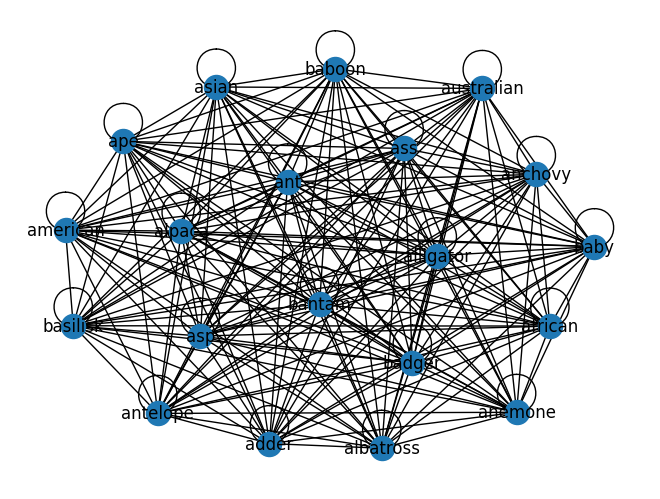

In [4]:
# creating graph 
G = nx.from_pandas_edgelist(df, 'word1', 'word2', ['sim'], create_using=nx.Graph)
# G = nx.from_pandas_edgelist(df, 'word1', 'word2', ['sim', 'weight', 'capacity'], create_using=nx.Graph)
nx.draw(G, with_labels=True)

In [10]:
rw = walker.random_walks(G, n_walks=4, walk_len=6, start_nodes=1, alpha = 0.2)

##python version difference 



AttributeError: module 'walker' has no attribute 'random_walks'